In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
fashion=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names=["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot",
]

In [10]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
y_train[0]

9

In [12]:
class_names[y_train[0]]

'Ankle boot'

In [13]:
class_names[y_train[6]]

'Sneaker'

'Sandal'

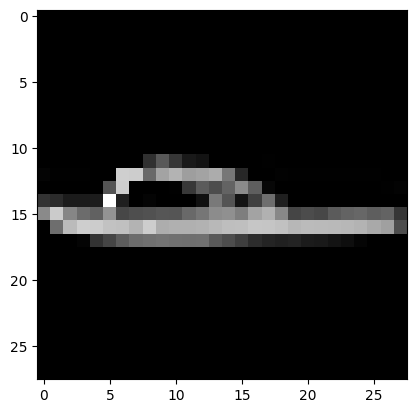

In [14]:
plt.imshow(x_train[30],cmap='gray')
class_names[y_train[30]]

In [15]:
SNN=keras.models.Sequential()
SNN.add(keras.layers.Flatten(input_shape=[28,28]))
SNN.add(keras.layers.Dense(300,activation="relu"))
SNN.add(keras.layers.Dense(100,activation="relu"))
SNN.add(keras.layers.Dense(10,activation="softmax"))

In [16]:
SNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
SNN.layers

In [18]:
Hidden1=SNN.layers[1]

In [19]:
weights, biases = Hidden1.get_weights()

In [20]:
weights

array([[ 2.3239464e-02,  4.0007941e-02, -3.4679297e-02, ...,
         4.1901797e-02,  1.2213968e-02,  2.3423508e-02],
       [-5.3560656e-02, -3.3046454e-02,  2.5601842e-02, ...,
        -4.7369912e-02,  2.5652044e-02,  5.0435424e-02],
       [-6.2634863e-02,  8.9797527e-03, -4.7189198e-02, ...,
         5.7024777e-02,  5.7543918e-02, -1.9633658e-02],
       ...,
       [-2.1536522e-02, -6.8898156e-02, -2.2574842e-02, ...,
         3.2718219e-02,  2.5495164e-02,  2.0114765e-02],
       [ 5.3684697e-02, -4.5891404e-03, -2.8449692e-02, ...,
        -5.4084543e-02, -1.1755429e-02, -6.8215385e-02],
       [-3.6384739e-02, -2.3558736e-05,  7.2477132e-02, ...,
         3.1971917e-02,  5.2603438e-02,  7.3724389e-02]], dtype=float32)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
SNN.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [28]:
history=SNN.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6988 - accuracy: 0.7659
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4820 - accuracy: 0.8323
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4365 - accuracy: 0.8476
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4095 - accuracy: 0.8563
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3880 - accuracy: 0.8637
Epoch 6/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3723 - accuracy: 0.8678
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3589 - accuracy: 0.8736
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3467 - accuracy: 0.8762
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3367 - accuracy: 0.8805
Epoch 10/30
1875/1875 [==============================] - 11s 6ms/step - loss: 

In [29]:
SNN.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8783


[0.33349207043647766, 0.8783000111579895]

<function matplotlib.pyplot.show(close=None, block=None)>

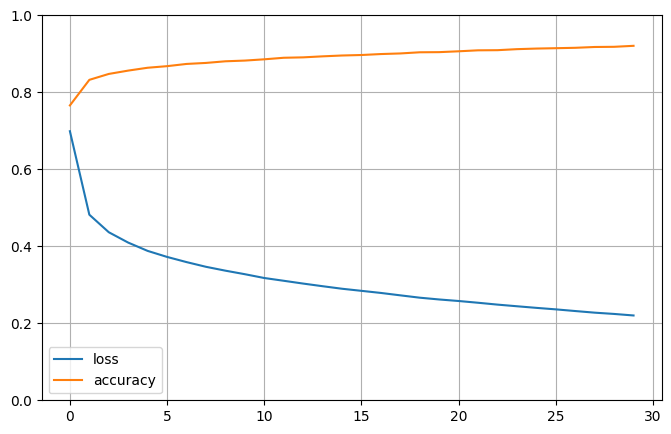

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [32]:
predict_y=SNN.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [34]:
predict_y.round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.98, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]], dtype=float32)

In [35]:
predict_class=np.argmax(predict_y,axis=1)

In [36]:
predict_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [38]:
np.array(class_names)[predict_class]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [46]:
from random import randrange

predicted item:Bag


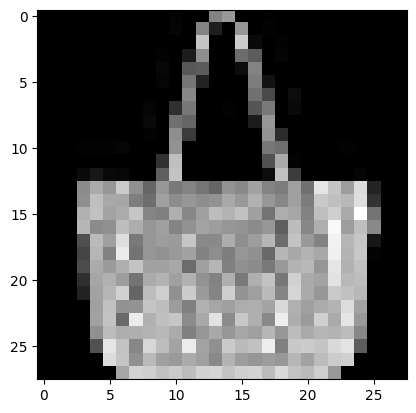

In [89]:
items=randrange(1000)
plt.imshow(x_test[items], cmap='gray')
print("predicted item:"+ str(class_names[predict_class[items]]))

In [78]:
from sklearn import metrics
confusionmat=metrics.confusion_matrix(y_test,predict_class)

In [63]:
import seaborn as sns

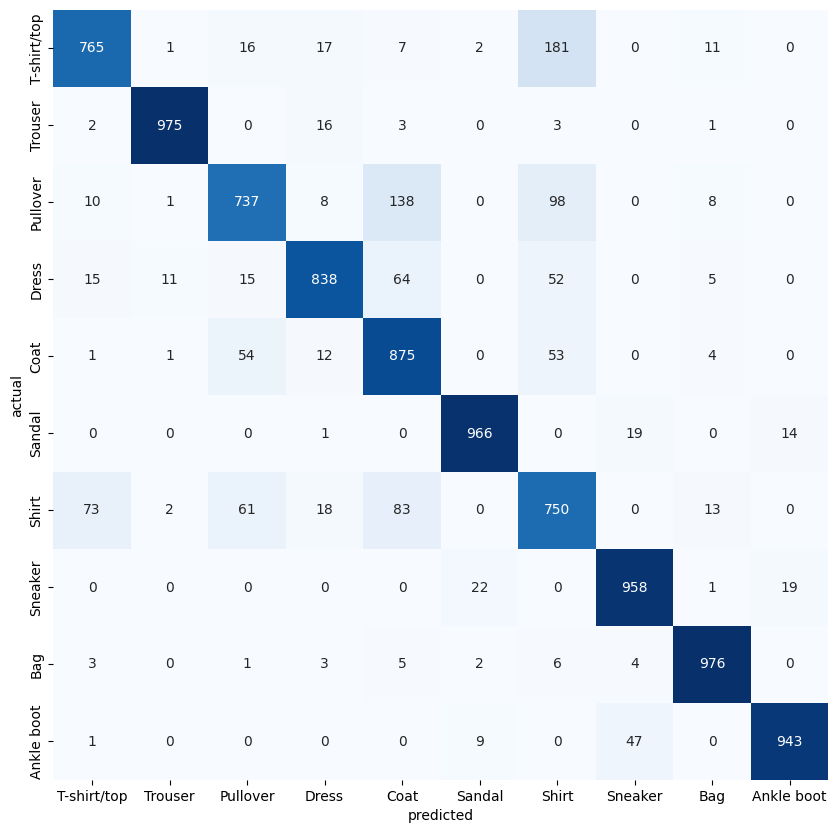

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(confusionmat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel("actual")
plt.xlabel("predicted")
plt.xticks(np.arange(10)+0.5,["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot",
])
plt.yticks(np.arange(10)+0.5,["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot",
])
plt.show()